# Touchsoft ML Course Preassignment

Hi,

This task will help you in getting familiar with Python ecosystem for machine learning

You'll write some code to create and train **your own** model

**Let's start and import some core libraries**

In [1]:
import numpy as np # number array processing support
import pandas as pd # data table processing support
import matplotlib.pyplot as plt # plotting support

**And do some magic to display graphs inplace**

In [2]:
%matplotlib inline

### Exploratory data analysis

In this assignment you will face **Wine  Quality** data

Let's load and explore it

![White wines](http://www.larevista.ro/wp-content/uploads/2016/04/vin.jpg)

In [3]:
data = pd.read_csv(filepath_or_buffer='../data/winequality-white.csv',sep=';')

In [4]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [5]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

OK, we see that our dataset contains 4898 rows and 12 numeric features. Description of features is provided below

**fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

**volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

**citric acid**: found in small quantities, citric acid can add ‘freshness’ and flavor to wines

**residual sugar**: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

**chlorides**: the amount of salt in the wine

**free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

**total sulfur dioxide**: amount of free and bound forms of SO2; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

**density**: the density of water is close to that of water depending on the percent alcohol and sugar content

**pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

**sulphates**: a wine additive which can contribute to sulfur dioxide gas (SO2) levels, wich acts as an antimicrobial and antioxidant

**alcohol**: the percent alcohol content of the wine

Our taget variable

**quality**: expert's score of current wine type



Let's face our data more closely and plot histograms of some features

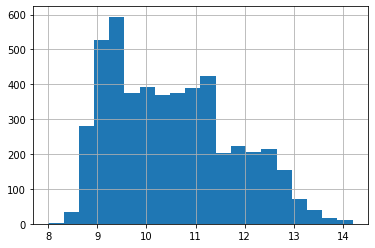

In [6]:
data['alcohol'].hist(bins=20)

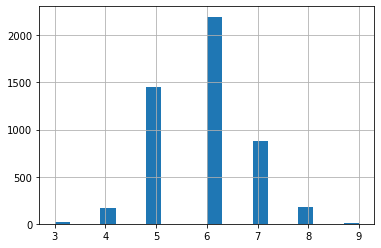

In [7]:
data['quality'].hist(bins=20)

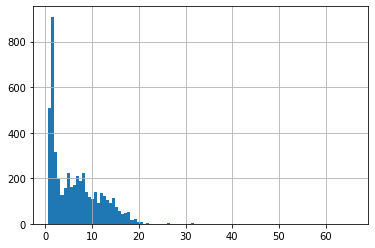

In [8]:
data['residual sugar'].hist(bins=100)

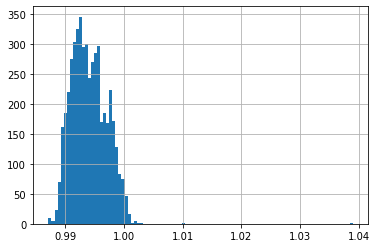

In [9]:
data['density'].hist(bins=100)

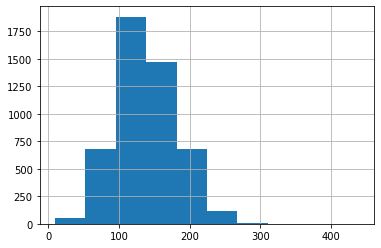

In [10]:
data['total sulfur dioxide'].hist()

Let's see how quality depends on **fixed acidity**

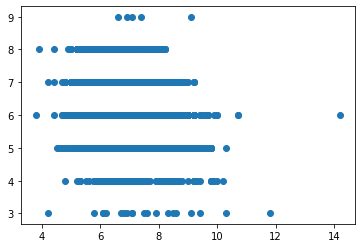

In [11]:
plt.scatter(data['fixed acidity'], data['quality'])

**Try to build your own graphs below**

Use [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) and [Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) documentation as reference

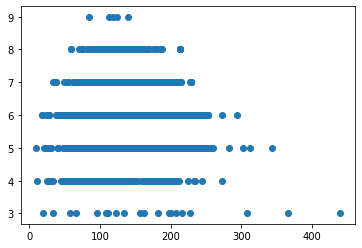

In [12]:
plt.scatter(data['total sulfur dioxide'], data['quality'])

### Feature engineering

**Note** : we will train linear regression model here (Ilya told about it).

Please try to obtain symmetric distribution of each feature here, actually most of them are already symmetric, applying logarithm should help for other.

**Hint**: As you probably seen, mean values of some features are more preferable for quality than extreme values. Please try to explain it to linear model

In [13]:
data['residual sugar'] = data['residual sugar'].map(lambda sugar: np.log1p(sugar) )
data['free sulfur dioxide'] = data['free sulfur dioxide'].map(lambda dioxide: np.log1p(dioxide))
data['total sulfur dioxide'] = data['total sulfur dioxide'].map(lambda dioxide: np.log1p(dioxide))
data[:5]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36        3.077312      0.045   
1            6.3              0.30         0.34        0.955511      0.049   
2            8.1              0.28         0.40        2.066863      0.050   
3            7.2              0.23         0.32        2.251292      0.058   
4            7.2              0.23         0.32        2.251292      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             3.828641              5.141664   1.0010  3.00       0.45   
1             2.708050              4.890349   0.9940  3.30       0.49   
2             3.433987              4.584967   0.9951  3.26       0.44   
3             3.871201              5.231109   0.9956  3.19       0.40   
4             3.871201              5.231109   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

Let's see what we got

In [14]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36        3.077312      0.045   
1            6.3              0.30         0.34        0.955511      0.049   
2            8.1              0.28         0.40        2.066863      0.050   
3            7.2              0.23         0.32        2.251292      0.058   
4            7.2              0.23         0.32        2.251292      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             3.828641              5.141664   1.0010  3.00       0.45   
1             2.708050              4.890349   0.9940  3.30       0.49   
2             3.433987              4.584967   0.9951  3.26       0.44   
3             3.871201              5.231109   0.9956  3.19       0.40   
4             3.871201              5.231109   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

### Prepare train/test split and train model

As soon as features are prepared, let's consume data to model.

**Note**: linear model requires data standartization. We will use [sklearn preprocessor](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for it.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
data_features = data.drop('quality', axis=1)
data_score = data['quality']
scaler = StandardScaler()
scaler.fit(data_features)

StandardScaler(copy=True, with_mean=True, with_std=True)

Splitting data to train/test parts. For small dataset 70/30 split considered as good practice, so let's follow it.

In [17]:
train_sample = np.random.choice(len(data), size=3400, replace=False)
test_sample = np.invert(data.index.isin(train_sample))

In [18]:
train_y = data_features.iloc[train_sample]
train_X = scaler.transform(data_features.iloc[train_sample])

In [19]:
test_y = data_score[test_sample]
test_X = scaler.transform(data_features[test_sample])

**Important**: We will minimize squared error. 

$E = (y_{true} - y_{predicted})^2 = (y_{true} - w X^T - b)^2$

There is a Linear Regression class template below. As you can see, it's `fit` method is lost somewhere, so you need to implement it yourself. Please use Gradient Decent method as follows:
$$
    w_{n+1} = w_n - \eta \frac{\partial E}{\partial w} \\
    b_{n+1} = b_n - \eta \frac{\partial E}{\partial b}
$$

You have to compute partial derivatives yourself. Use norm of update step as stopping criteria. $\eta$ is learning rate here.


In [20]:
class LinRegression():
    coef_ = None
    bias_ = None
    learning_rate_= None
    stop_threshold_ = None

    def __init__(self, learning_rate=1e-3, stop_threshold=0.01) -> None:
        self.learning_rate_ = learning_rate
        self.stop_threshold_ = stop_threshold

    def fit(self, X : np.ndarray, y : np.ndarray):
        self.coef_ = np.random.randn(1, X.shape[1])
        self.bias_ = np.random.randn()
        unit = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
        for i in range(0, y.shape[0]):
            w_x_i = self.coef_ @ X[i].transpose()
            braces = (y[:i].values - w_x_i - self.bias_)
            if braces.size != 0:
                self.coef_ = self.coef_ - self.learning_rate_ * (-2 * X[i].transpose()) @ braces[0]
                w_x_i = self.coef_ @ X[i].transpose()
                braces = (y[:i].values - w_x_i - self.bias_)
                self.bias_ = self.bias_ - self.learning_rate_ * (-2) * braces[0] @ unit
                w_x_i = self.coef_ @ X[i].transpose()
                braces = (y[:i].values - w_x_i - self.bias_)
                e = braces[0] @ braces[0].transpose()
                if e < self.stop_threshold_:
                    break
        pass

    def predict(self, X : np.ndarray):
        return self.coef_@ X.T + self.bias_

In [21]:
lr = LinRegression()
lr.fit(train_X, train_y)

In [22]:
y_pred = lr.predict(test_X)

In [23]:
from sklearn.metrics import mean_squared_error

If you completed model correctly, \~ 0.6 score is expected below.

In [24]:
mean_squared_error(test_y, y_pred.transpose())

13.707781204657314

As a completion, let's compare [Sklearn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) with our model

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X, train_y)
y_pred = lr.predict(test_X)
mean_squared_error(test_y, y_pred.transpose()[0])

2.6044876502002676